#6. 분류
회귀 - 목표데이터가 연속적인 수치값(선형)인것. 예측값. _ex) 나이와 몸무게정보(input)를 이용하여 키를 예측(output)하는 것_

분류 - 목표데이터가 비연속적인 클래스(비선형적), 즉 일종의 카테고리들. *ex) 몸무게와 키 정보(input)를 가지고 저체중과 정상체중, 과체중을 구분(output(classes))하는것*

이번 장의 주제인 분류에서는 확률의 개념을 다루게 되는데. 이를 통해 불확실성을 정량적으로 다룰 수 있게 됩니다.
즉, 입력된 데이터가 클래스별로 그 클래스로 분류될 확률에 관해 다루게 됩니다.

##기본 이론. 어떻게 분류할 것인가

어떠한 데이터가 있을떄 그 데이터의 결과값을 구분하는 기준이 있고 그 기준을 중심으로 클래스를 구분한다면 데이터를 분류할 수 있을것이다.
아래의 그래프와 같이 그러한 기준선을 결정 경계라고 한다.

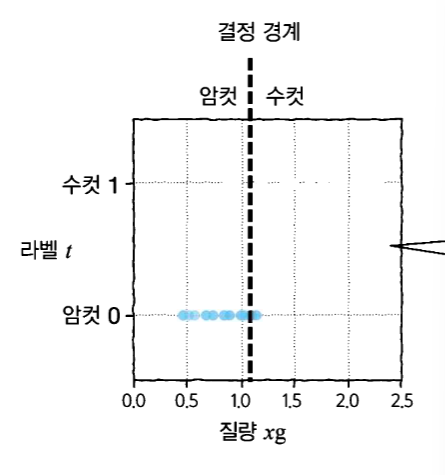

회귀와 같은 방법을 사용한 모델을 결과(label)을 0와 1로 주어 예측값이 0에 가까운지 1에 가까운지로 분류를 한다면, 적어도 단순한 직선 모델만으론 정확도의 문제가 생긴다



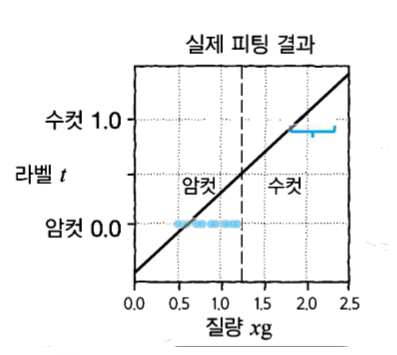

위의 사진은 0.5의 확률로 암,수가 구분되는 곤충을 질량값(input)으로 암,수(classes)를 구분하는 데이터에 모델의 직선을 그린것이다.

 정답값인 확률 0.5를 기준으로 회귀 그래프를 그린것인데 사징과 같이 0.5확률에 고정된 채로는 직선의 기울기를 조정해도 암컷과 수컷의 데이터를 모두 정확하게 가르킬 수 없다.
즉 데이터를 조정하는 과정에서 오차가 생기게된다.

(확실하게 암컷인 데이터와 확실하게 수컷인 데이터의 오차를 조정하는 과정에서 결국 데이터를 명확히 가르는 직선은 충족할 수 없다.)

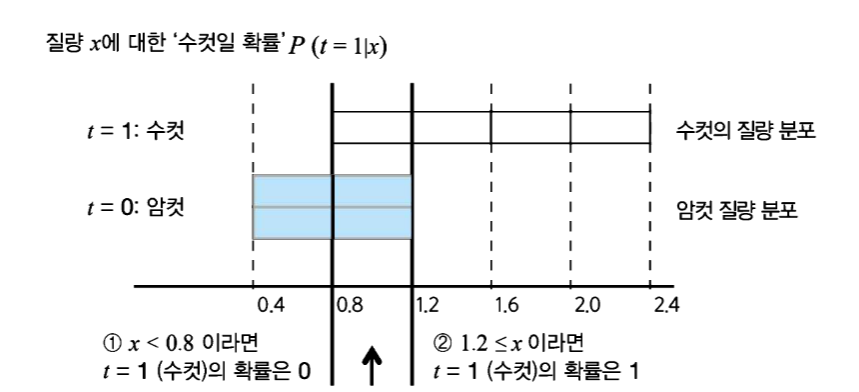

위의 그래프를 본다면 0.8과 1.2에서 명확하게 암 수 가 구분되지 않음을 확인할 수 있다.

그렇다면 질량이 0.8과 1.2사이인 데이터는 어떻게 분류할 것인가. 그것은 확률로써 나타낼 수 있게된다.

가령 위의 데이터를 기준으로 한다면, 0.8과 1.2사이에서 암컷의 데이터량이 2고 수컷의 데이터량이 1이라면 수컷일 확률은 1/3이 된다.


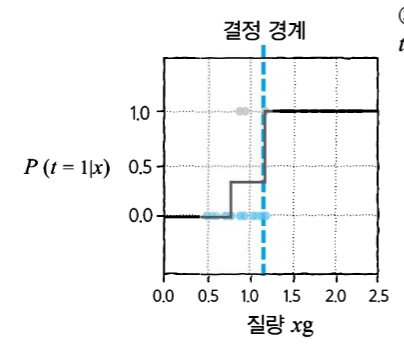

즉 어떤 클래스로 나눌지 불확실한 부분도 확률로써 값을 가질 수 있게 된다.

그렇다면 결정 경계는 어디 그어야할까 그것의 답은 암, 수를 구분짓는 확률 0.5가 나타나는 1.2g지점에 그어야 합니다.

다만, 우리 주어진 데이터를 통해 클래스를 구분짓는 확률를 구하여 결정 경계를 정해야하므로 그 확률은 데이터를 통해 구해야할 필요성이 있습니다.
그 방법은 다음에 설명할 최대가능도법을 사용할 것입니다.

##최대가능도법. 데이터가 클래스별로 나뉘는 확률에 근사

최대가능도법에 대해 알기위해서는 가능도(우도)를 알아야합니다. 가능도는 주어진 데이터 집합이 나타나기위한 확률이라고 보면 됩니다.

가령 T = [1,1,0,1]인 데이터가 있다면 이 데이터가 1일 확률(P(t=1|x)(데이터 x의 t(label)이 1일 확률))이 0.7이라고 할때

가능도는 0.7 x 0.7 x 0.3 x 0.7입니다.


> 여담이지만, P(t=1|x)의 값에 따라 달라지지만,x축이 class별 나타난 갯수고 y가 나타난 가능도인 그래프를 그린다면 P(t=1|x)의 값이 크게 치우치지 않을수록 가우시안 그래프를 그리는 경우가 많을것같다.



최대가능도법은 P(t=1|x)의 값에따라 변하는 현재 주어진 데이터집합의 가능도를 계산하여 가능도가 가장 최대가 되는 P(t=1|x)의 값를 찾는 것이다.

즉, 현재의 데이터집합이 만들어질 확률이 가장높은 P(t=1|x)의 값을 찾는다는것.

>예시
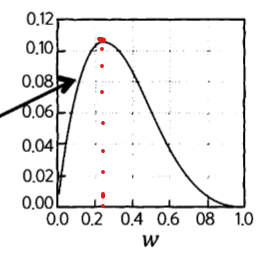

P(t=1|x) = w 이고, t1이 t가 1일때 데이터x에서의 출현갯수라면,

가능도를 구하는 식은

>(1-w)^t0 x w^t1

이다.

(1-w)를 y0(=데이터에서 t=0일 확률),w를 y1(=데이터에서 t=1일 확률)으로 본다면,

>y0^t0 x y1^t1

이 된다.

즉, class가 늘어난다면, 클래스를 구분하기위한 변수 t의 종류도 늘어나게되고 그에따라 y를 늘려준다면

class가 n개일때

>y0^t0 x y1^t1 x ... x y(n-1)^t(n-1)

>= 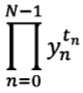


위의 원리를 바탕으로 계산의 편의성을 위해 log를 이용하여 더하기로 바꾼후 최대를 구하는데. log는 지수함수처럼 증가함수이기에 -1를 곱할 필요없이 바로 log를 씌워서 계산할 수 있다.



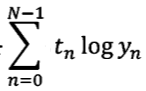

##로지스틱 회귀모델. 회귀모델로 확률계산하기

선형 회귀모델을 비선형함수이면서 0~1라 확률을 표현할수있는 시그모이드 함수를 통과시켜 확률로써의 값을 가질 수 있게함.

이후 다루는 확률모델은 모두 로지스틱회귀모델을 염두한 설명이다.

##교차 엔트로피 오차

최대가능도법을 이용해 각 데이터마다의 클래스의 가능도를 곱한 오차계산법
그렇게 얻은 각 클래스마다의 확률값(매개변수 w = 가중치)이 모델을 결정한다.

데이터의 수만큼 가능도를 구하므로 K개의 데이터가 있을때 교차 엔트로피 오차 식

최소값을 구하는 MSE와 맞추기 위해 -1을 곱하여 최대가 아닌 최소를 구하도록 만듬.

>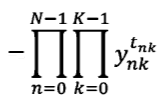

아래식은 계산의 편의성을 위하여 log를 취해준 식
>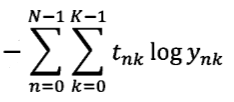

아래식은 평균 교차 엔트로피 오차 함수로,
평균을 내기위해 교차엔트로피 오차 함수를 데이터의 갯수인 K로 나눈 것이다.

평균 교차 엔트로피를 사용하는 이유는 데이터 수의 영향없이 오차 결과를 얻어 수치를 확인하고 결과를 분석하기 용의 하게 하기 위해서이다.
>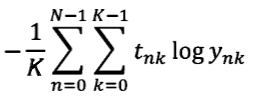

##경사하강법을 적용하기위한 미분

미분을 하기전에 이전 내용을 정리하자면

- 데이터 x를 로지스틱 회귀 모델을 통해 각 클래스 t일 확률 y를 구하고,

- 각 w에 따른 데이터의 가능도(En)의 합(교차엔트로피오차)으로 오차(E)를 구한 후

- 경사하강법으로 y를 결정하는 모델의 매개변수w를 최적화 한다.

의 과정을 가집니다. (이 이후부터는 데이터 수가 N, class수가 K)

즉, 경사하강법을 하기위해 미분해야하는 식은
>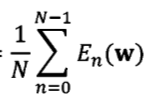
(N은 데이터 수)

E'(x) = 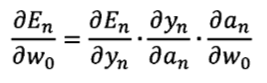


E는 가능도, y는 확률, a는 시그모이드, w는 선형회귀모델의 매개변수

아래는 미분해야할 식 들 입니다.

>1) En(yn)=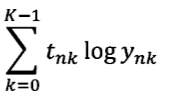

>2) 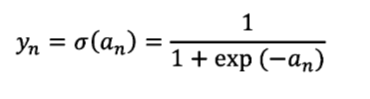

>3) 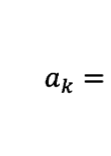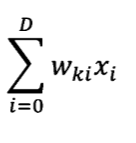

D는 입력된 feature수(차원수), k는 class 수

클래스 별로 구한 값들로 소프트맥스를 이용하여 an를 구함.

>1) 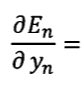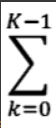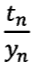

>2) 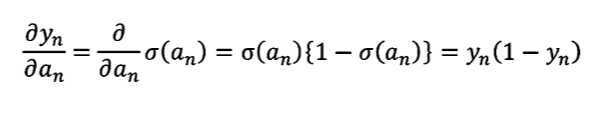

> 3)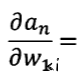xi

위의 값을 모두 곱해서 E에 대한 미분을 구하면 아래의 식이 나온다

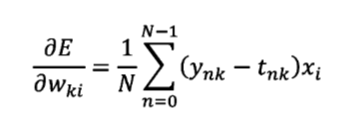